In [ ]:
!pip install PyDrive pandas numpy matplotlib scipy gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# LINK de share: https://drive.google.com/file/d/1EKnr9m--vsEeX9x4sJQ58m3dkl7_23ub/view?usp=sharing
# ID: 1EKnr9m--vsEeX9x4sJQ58m3dkl7_23ub
# LINK DE DESCARGA: https://drive.google.com/uc?id=1EKnr9m--vsEeX9x4sJQ58m3dkl7_23ub
!gdown https://drive.google.com/uc?id=1EKnr9m--vsEeX9x4sJQ58m3dkl7_23ub
#1_4
#!gdown https://drive.google.com/uc?id=1EKnr9m--vsEeX9x4sJQ58m3dkl7_23ub

Downloading...
From: https://drive.google.com/uc?id=1EKnr9m--vsEeX9x4sJQ58m3dkl7_23ub
To: /content/TUP2.txt
100% 1.36M/1.36M [00:00<00:00, 135MB/s]


In [2]:
#Nombre del archivo CAMBIAR
archivo = 'TUP2.txt'
with open(archivo, "r") as r:
  with open('data.csv', "w") as w:
    w.write(r.read().replace(';' , '\n'))

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statistics
%matplotlib inline

In [38]:
df = pd.read_csv('data.csv', header=None)
res, bins = pd.cut(df[df.columns[0]],range(55000, 130000, 7100), right=False, retbins=True)
res = pd.DataFrame(res)
res

,0
0,"[55000, 62100)"
1,"[62100, 69200)"
2,"[62100, 69200)"
3,"[104700, 111800)"
4,"[97600, 104700)"
...,...
212987,"[76300, 83400)"
212988,"[97600, 104700)"
212989,"[111800, 118900)"
212990,"[83400, 90500)"


In [39]:
res.value_counts().to_csv('tabla_frecuencia.csv')
res.value_counts()

[118900, 126000)    21495
[90500, 97600)      21412
[55000, 62100)      21381
[62100, 69200)      21373
[104700, 111800)    21284
[69200, 76300)      21277
[111800, 118900)    21268
[76300, 83400)      21222
[97600, 104700)     21170
[83400, 90500)      21108
dtype: int64

In [40]:
samples = res.value_counts().sort_index()
samples.to_numpy().flatten()

array([21381, 21373, 21277, 21222, 21108, 21412, 21170, 21284, 21268,
       21495])

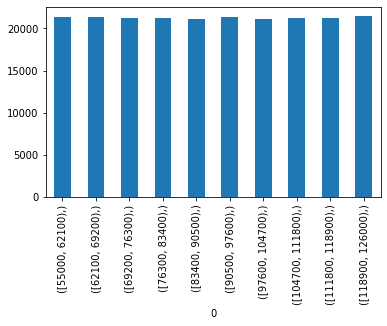

In [41]:
fig, ax = plt.subplots(figsize=(6, 3.5))
(
    pd.Series(samples).plot.bar(ax=ax)
)


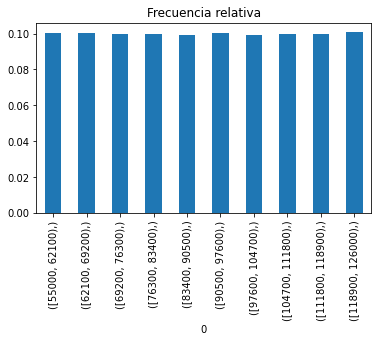

In [42]:
# Creamos histograma de frecuencias
fig, ax = plt.subplots(figsize=(6, 3.5))
(
    pd.Series(samples/samples.sum(axis=0)).plot.bar(ax=ax, title='Frecuencia relativa')
)


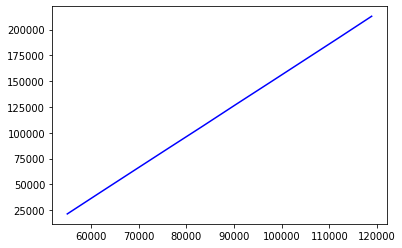

In [77]:
cumulative = np.cumsum(pd.Series(samples))
# Creamos grafico de frecuencias acumuladas
plt.plot(bins[:-1], cumulative, c='blue')
plt.show()

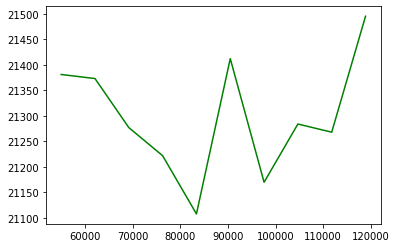

In [63]:
plt.plot(bins[:-1], samples, c='green')
plt.show()

In [49]:
medidas_tendencia_central = {}
medidas_tendencia_central['Media'] = df[df.columns[0]].mean()
medidas_tendencia_central['Mediana'] = df[df.columns[0]].median()
medidas_tendencia_central['Moda'] = list(df[df.columns[0]].mode())
medidas_tendencia_central['Porcentaje de autos que realizan la VTV con menos de 70mil Km'] = 21.21159

medidas_tendencia_central

{'Media': 90508.47110220102,
 'Mediana': 90547.0,
 'Moda': [58550, 71331, 113294, 115473],
 'Porcentaje de autos que realizan la VTV con menos de 70mil Km': 21.21159}

In [47]:
medidas_dispersion = {}
medidas_dispersion['Varianza'] = df[df.columns[0]].var()
medidas_dispersion['Desvio estándar'] = df[df.columns[0]].std()
medidas_dispersion['Cuartil 1'] = df[df.columns[0]].quantile(0.25)
medidas_dispersion['Cuartil 3'] = df[df.columns[0]].quantile(0.75)
medidas_dispersion['Rango intercuartilico'] = df[df.columns[0]].quantile(0.75) - df[df.columns[0]].quantile(0.25)
medidas_dispersion['Coeficiente de variación'] = (df[df.columns[0]].std() / df[df.columns[0]].mean()) * 100
medidas_dispersion['Coeficiente de asimetría de Pearson'] = df[df.columns[0]].skew()
medidas_dispersion['P30'] = 69200 + ((((30 * 212992) / 100) - 42754) / 21277) * 7100

medidas_dispersion

{'Varianza': 421244853.7043449,
 'Desvio estándar': 20524.250381057645,
 'Cuartil 1': 72692.75,
 'Cuartil 3': 108306.0,
 'Rango intercuartilico': 35613.25,
 'Coeficiente de variación': 22.676607096679298,
 'Coeficiente de asimetría de Pearson': 0.0002707789859456798,
 'P30': 76255.48526577995}

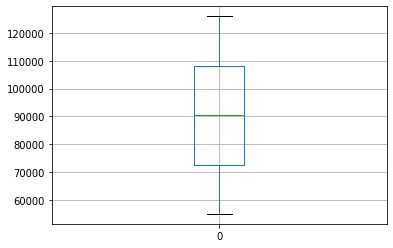

In [32]:
df.boxplot(column=[df.columns[0]])

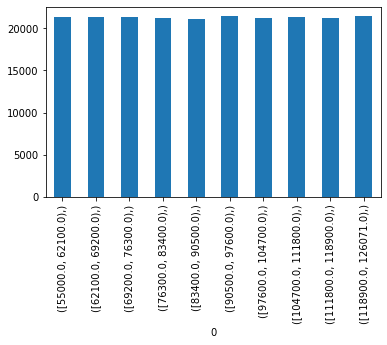

In [37]:
#Quitamos valores extremos
df2 = df[df[df.columns[0]] > 10000]

res2, bins = pd.cut(df2[df2.columns[0]],10, right=False, retbins=True)
res2 = pd.DataFrame(res2)

samples2 = res2.value_counts().sort_index()
samples2.to_numpy().flatten()

fig, ax = plt.subplots(figsize=(6, 3.5))
(
    pd.Series(samples2.sort_index()).plot.bar(ax=ax)
)

#Ejercicio: Quitar los valores extremos grandes usando nombre variables df3, res3 y samples3

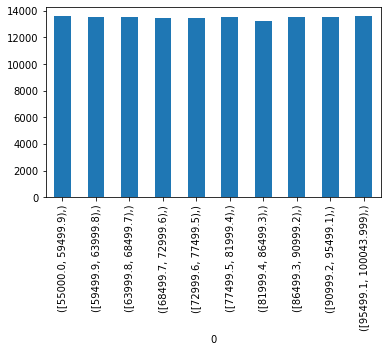

In [30]:
df3 = df[(df[df.columns[0]] < 100000) & (df[df.columns[0]] > 10000)]

res3, bins = pd.cut(df3[df3.columns[0]],10, right=False, retbins=True)
res3 = pd.DataFrame(res3)

samples3 = res3.value_counts().sort_index()
samples3.to_numpy().flatten()

fig, ax = plt.subplots(figsize=(6, 3.5))
(
    pd.Series(samples3.sort_index()).plot.bar(ax=ax)
)